# Alpha Vantage API - Technical Indicators
______________________

## Collecting information for a stock/ETF technical analysis using Alpha Vantage API

In [28]:
# Import libraries
import os
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Read in the API Key (obtained at https://www.alphavantage.co/documentation/) 
apikey = os.getenv('ALPHA_VANTAGE_KEY')
ticker = 'TSLA'

# Company Overview

In [29]:
# Company overview
company_overview = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={apikey}"
response_data = requests.get(company_overview).json()
response_data

{'Symbol': 'TSLA',
 'AssetType': 'Common Stock',
 'Name': 'Tesla, Inc',
 'Description': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limite

# EMA - Exponential Moving Average

In [56]:
# Customize url to obtain EMA (exponential moving average) data
interval = 'daily'
time_period = '30'

ema = f"https://www.alphavantage.co/query?function=EMA&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(ema).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: EMA'])

In [57]:
ema = response_data['Technical Analysis: EMA']
# Create dataframe from json type response
ema_df = pd.DataFrame(ema)
# Transform dataframe 
ema_df = ema_df.T
# Convert data from object type to float type 
ema_df = ema_df.astype('float').iloc[:252]
ema_df

,EMA
2021-04-09,679.2629
2021-04-08,679.4176
2021-04-07,679.1154
2021-04-06,679.6771
2021-04-05,678.8535
...,...
2020-04-16,117.8471
2020-04-15,115.6957
2020-04-14,113.6081
2020-04-13,111.6515


<AxesSubplot:title={'center':'EMA TSLA'}, ylabel='Price ($)'>

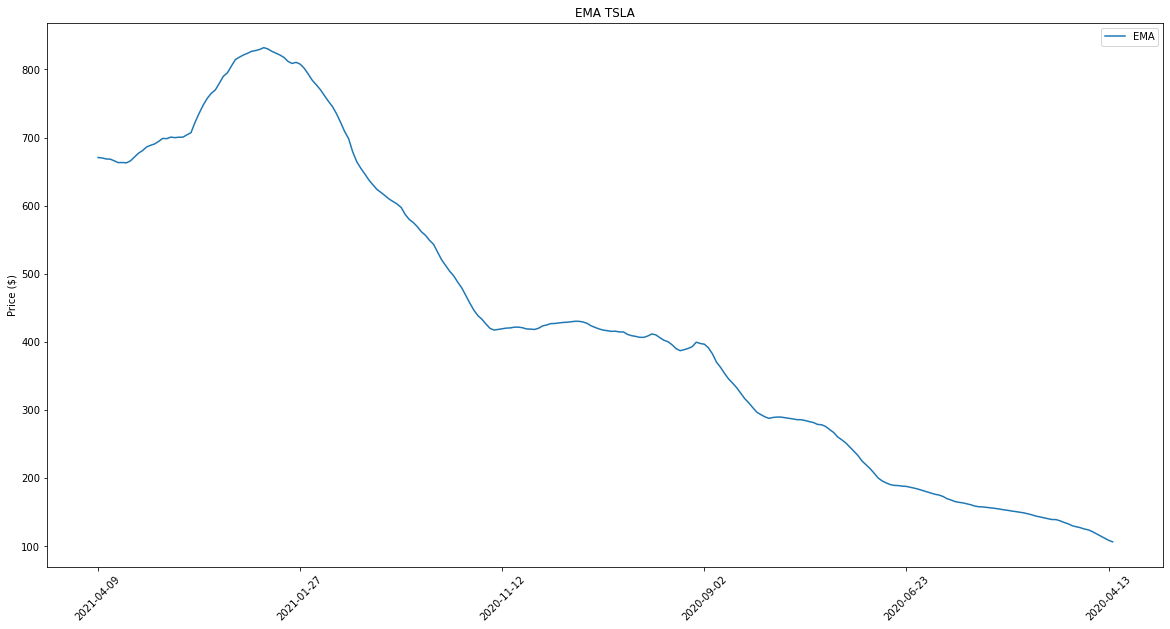

In [53]:
# Plot EMA
ema_plot = ema_df.plot(figsize=(20,10), ylabel='Price ($)', title=f'EMA {ticker}', rot=45)
ema_plot

# MACD - Moving Average Convergence Divergence

In [3]:
# Customize the URL to create MACD request. Input time interval
interval = 'daily'

macd = f"https://www.alphavantage.co/query?function=MACD&symbol={ticker}&interval={interval}&series_type=close&apikey={apikey}"

response_data = requests.get(macd).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: MACD'])

In [4]:
macd = response_data['Technical Analysis: MACD']
# Create dataframe from json type response
macd_df = pd.DataFrame(macd)
# Transform dataframe 
macd_df = macd_df.T
# Convert data from object type to float type 
macd_df = macd_df.astype('float').iloc[:252]
macd_df.tail()

,MACD,MACD_Hist,MACD_Signal
2020-04-16,5.4857,7.1301,-1.6444
2020-04-15,3.3068,6.7337,-3.4270
2020-04-14,0.7908,5.9012,-5.1104
2020-04-13,-2.0260,4.5597,-6.5857
2020-04-09,-4.3914,3.3342,-7.7256


<AxesSubplot:title={'center':'MACD TSLA'}>

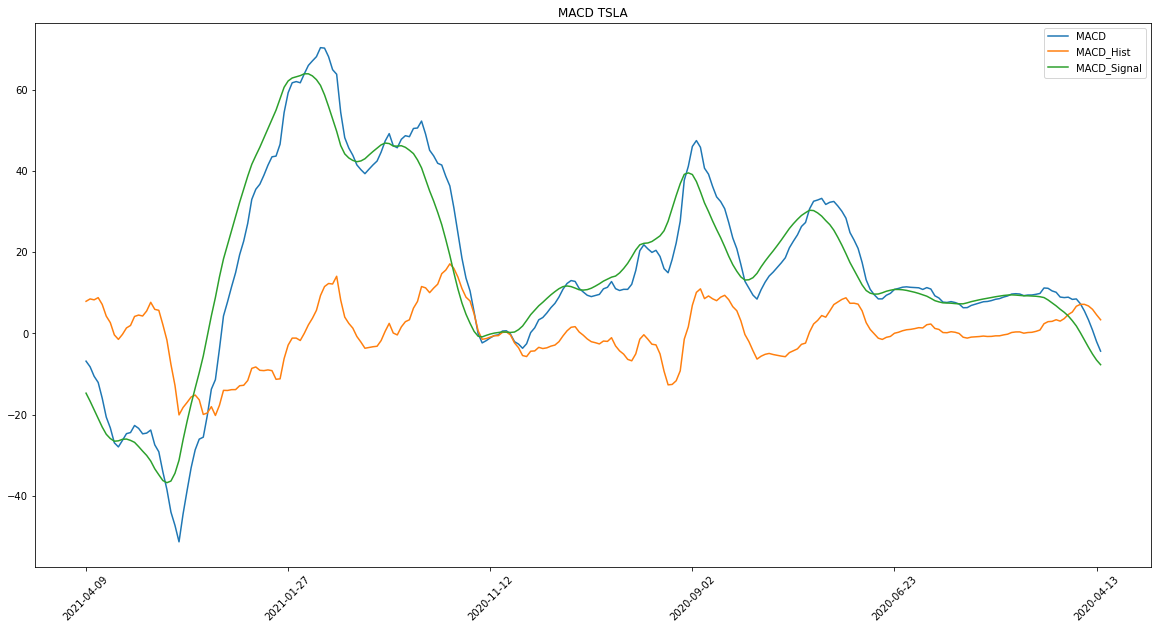

In [60]:
# Plot MACD and select number of datapoints to be plotted
macd_plot = macd_df.plot(figsize=(20,10), title=f'MACD {ticker}', rot=45)
macd_plot

In [ ]:
# MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish.
# Source: https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/macd

# Bollinger Bands

In [58]:
# Create url request for Bollinger Bands and select time period
interval = 'daily'
time_period = "30"

bbands = f"https://www.alphavantage.co/query?function=BBANDS&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}" 

response_data = requests.get(bbands).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])

In [59]:
bbands = response_data['Technical Analysis: BBANDS']
# Create dataframe from json type response
bbands_df = pd.DataFrame(bbands)
# Tranform datatframe
bbands_df = bbands_df.T
# Convert data from object type to float type 
bbands_df = bbands_df.astype('float').iloc[:252]
bbands_df

,Real Lower Band,Real Upper Band,Real Middle Band
2021-04-09,593.1942,730.6838,661.9390
2021-04-08,593.1903,731.0344,662.1123
2021-04-07,589.7305,738.3755,664.0530
2021-04-06,589.6471,740.3169,664.9820
2021-04-05,588.8984,742.5910,665.7447
...,...,...,...
2020-04-16,69.2205,150.7401,109.9803
2020-04-15,69.1385,150.8794,110.0089
2020-04-14,68.8614,151.3655,110.1135
2020-04-13,68.3274,152.3493,110.3383


<AxesSubplot:title={'center':'BBANDS TSLA'}, ylabel='Price ($)'>

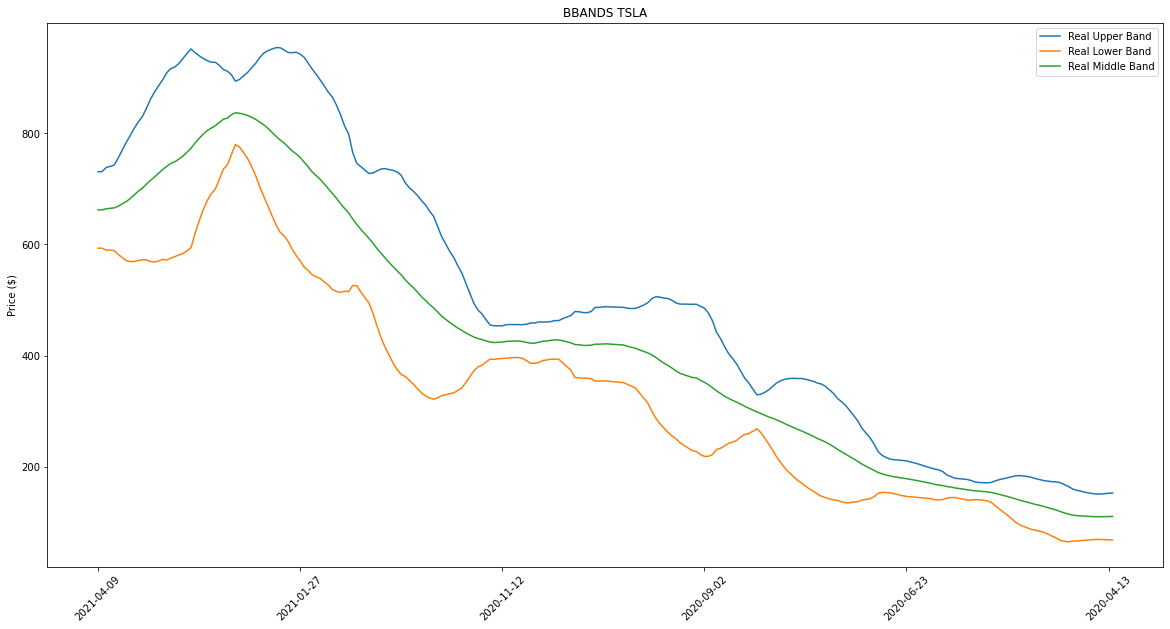

In [47]:
# Plot Bollinger Bands
bbands_plot = bbands_df.plot(figsize=(20,10), ylabel="Price ($)", title=f'BBANDS {ticker}', rot=45)
bbands_plot

In [ ]:
# When stock prices continually touch the upper Bollinger Band, the prices are thought to be overbought; conversely, when they continually touch the lower band, prices are thought to be oversold, triggering a buy signal.
# Source: https://www.investopedia.com/articles/technical/102201.asp 

# RSI - Relative Strength Index

In [16]:
# Customize url to obtain RSI data. Input desired interval and time period
interval = 'daily'
time_period = '30'

rsi = f"https://www.alphavantage.co/query?function=RSI&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(rsi).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: RSI'])

In [17]:
rsi = response_data['Technical Analysis: RSI']
# Create dataframe from json type response
rsi_df = pd.DataFrame(rsi)
# Tranform datatframe
rsi_df = rsi_df.T
# Convert data from object type to float type 
rsi_df = rsi_df.astype('float').iloc[:252]
rsi_df

,RSI
2021-04-09,49.1480
2021-04-08,49.6667
2021-04-07,48.6758
2021-04-06,50.2139
2021-04-05,50.1718
...,...
2020-04-16,59.0756
2020-04-15,58.3915
2020-04-14,57.5012
2020-04-13,54.7336


<AxesSubplot:title={'center':'RSI TSLA'}>

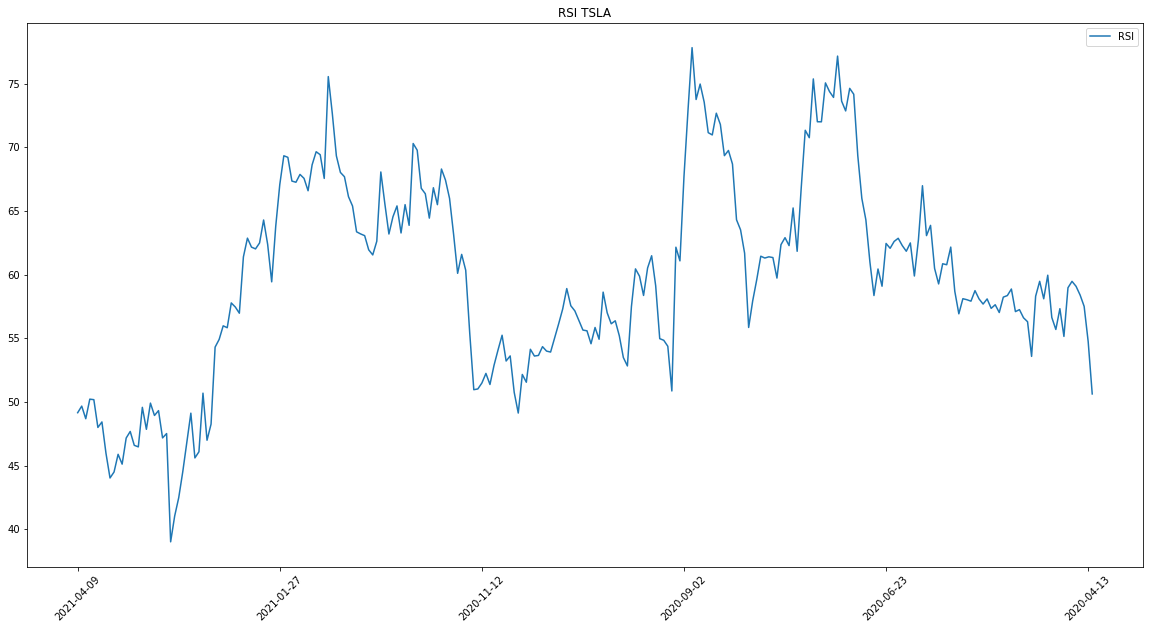

In [25]:
rsi_df.plot(figsize=(20,10),title=f"RSI {ticker}", rot=45)

In [ ]:
# Traditional interpretation and usage of the RSI dictates that values of 70 or above suggest that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective price pullback. An RSI reading of 30 or below indicates an oversold or undervalued condition. 
# Source: https://www.investopedia.com/articles/active-trading/042114/overbought-or-oversold-use-relative-strength-index-find-out.asp